<a href="https://colab.research.google.com/github/antoineor/Classifier-project/blob/main/Startup_Classifier_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!wget -O data.csv https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv

--2025-02-02 17:54:21--  https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315563 (308K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>] 308.17K  --.-KB/s    in 0.02s   

2025-02-02 17:54:21 (18.5 MB/s) - ‘data.csv’ saved [315563/315563]



In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv("data.csv", encoding="ISO-8859-1")
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


<Axes: xlabel='Dependent-Company Status', ylabel='Dependent-Company Status'>

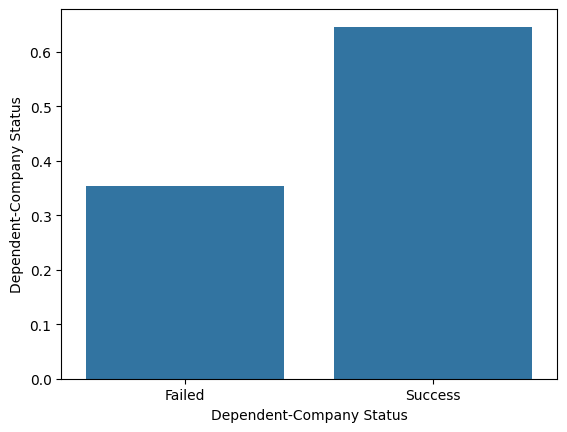

In [115]:
#Frequency of label

freq = data.groupby(['Dependent-Company Status'])['Dependent-Company Status'].count()/472

sns.barplot(freq)

In [116]:
#Find all NaN

handle_nan_encod = {
    'No Info': np.nan,
    'none': np.nan,
    'no': np.nan}

data.replace(handle_nan_encod, inplace = True)

In [117]:
# Handle unconstistent strings
for i in data.select_dtypes('object').columns :
  data[i] = data[i].str.lower().str.strip()

In [ ]:
# dropping all the columns with > 20% NaN
to_keep = []
for i in data.columns :
  if data[i].isna().sum()/472 < 0.10:
    to_keep.append(i)
to_keep

['Company_Name',
 'Dependent-Company Status',
 'Focus functions of company',
 'Number of Co-founders',
 'Number of of advisors',
 'Team size Senior leadership',
 'Number of of repeat investors',
 'Worked in top companies',
 'Average size of companies worked for in the past',
 'Have been part of startups in the past?',
 'Have been part of successful startups in the past?',
 'Was he or she partner in Big 5 consulting?',
 'Consulting experience?',
 'Product or service company?',
 'Catering to product/service across verticals',
 'Focus on consumer data?',
 'Subscription based business',
 'Cloud or platform based serive/product?',
 'Local or global player',
 'Linear or Non-linear business model',
 'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
 'Crowdsourcing based business',
 'Crowdfunding based business',
 'Machine Learning based business',
 'Predictive Analytics business',
 'Speech analytics business',


In [118]:
data_1 = data[to_keep].drop('Company_Name', axis = 1)

In [119]:
# Print uniques and find insights about data

for i in data_1.columns :
  print('='*50)
  print('')
  print(i, data[i].unique())
  print('')


Dependent-Company Status ['success' 'failed']


Focus functions of company ['operation' 'marketing, sales' 'operations' 'marketing & sales'
 'analytics' 'research' 'computing' 'marketing' 'sales, marketing'
 'marketing \nsales' 'technology' 'data management' 'solution providing'
 'social media' 'targeted marketing' 'community betterment'
 'web analytics' 'strategy' 'bug fix' 'data integration'
 'malware protection' 'social media optimization' 'database management'
 'sales' 'risk' 'marketing, web analytics'
 'strategy, operations, finacial planning' 'data collection' 'marketiing'
 'e-learning' 'software service' 'mobile app' 'application' 'analytic'
 'software' 'social media management' 'personal apps' 'consumer behaviour'
 'customer servce' 'customer service' 'app revenue'
 'intellectual property analysis and visualisation' 'retail'
 'data visualization' 'service' 'security' 'operations, sales, marketing'
 'marketing, technology, finance & accounting, customer service'
 'computing, tr

# Handling the column focus function of the company



In [120]:
#Handling focus functions of the company

category_mapping = {
    "sales": "marketing & sales",
    "sale": "marketing & sales",
    "sales & marketing": "marketing & sales",
    "sales, marketing": "marketing & sales",
    "marketing, sales": "marketing & sales",
    "marketing & sales": "marketing & sales",
    "marketing \nsales":"marketing & sales",

    "analytics": "data analytics",
    "analytic": "data analytics",
    "analtics": "data analytics",
    "big data analytics": "data analytics",
    "social media analytics": "data analytics",

    "operations": "business operations",
    "operation": "business operations",
    "operations, marketing": "business operations",

    "technology": "tech",
    "software": "tech",
    "software service": "tech",
    "software ": "tech",
    "mobile app development": "tech",
    "app": "tech",
    "application": "tech",

    "social media": "digital marketing",
    "social media management": "digital marketing",
    "social branding": "digital marketing",
    "social advertising": "digital marketing",

    "research": "data research",
    "market research": "data research",

    "data visualization": "data analytics",



    "strategy": "business strategy",
    "marketing, strategy": "business strategy",

    "crm": "customer relationship management",
    "customer engagement": "customer relationship management",
    "customer service": "customer relationship management",
    "customer servce": "customer relationship management",

    "finance": "financial services",
    "risk": "financial services",

    "e-learning": "education",
    "elearning": "education",

    "curated web": "web",
    "search": "search engine optimization",
    "search engine": "search engine optimization",

    "games": "gaming",
    "game": "gaming",

    "music": "entertainment",
    "online music": "entertainment",

    "recommendation": "recommendation engine",
    "recommendation ": "recommendation engine",

    "global": "international business",
    "GLOBAL": "international business"
}

data_1['Focus functions of company'] = data_1['Focus functions of company'].replace(category_mapping)

In [121]:
data_1['Focus functions of company'].value_counts()

,count
Focus functions of company,
business operations,77
marketing,62
data analytics,45
tech,35
marketing & sales,33
...,...
"customer retention, customer feedback",1
tool,1
development tool,1


In [122]:
#Second mapping : 15 categories

category_mapping = {
    # First 15 categories
    'business operations': 'business operations',
    'marketing': 'marketing',
    'data analytics': 'data analytics',
    'tech': 'tech',
    'marketing & sales': 'marketing & sales',
    'business strategy': 'business strategy',
    'web': 'web',
    'digital marketing': 'digital marketing',
    'advertising': 'advertising',
    'service': 'service',
    'data research': 'data research',
    'entertainment': 'entertainment',
    'customer relationship management': 'customer relationship management',
    'social network': 'social network',
    'database management': 'database management',

    # Mapped similar terms
    'financial services': 'business operations',
    'security': 'tech',
    'gaming': 'entertainment',
    'search engine optimization': 'digital marketing',
    'international business': 'business strategy',
    'education': 'business strategy',
    'data collection': 'data analytics',
    'marketing,sales': 'marketing & sales',
    'social media optimization': 'digital marketing',
    'networking': 'tech',
    'consumer web': 'web',
    'data management': 'data analytics',
    'social tv analytics': 'data analytics',
    'location based service': 'tech',
    'music intelligece': 'entertainment',
    'publishing': 'advertising',
    'web analytics': 'web',
    'social media marketing': 'digital marketing',
    'social commerce': 'digital marketing',
    'iphone apps': 'tech',
    'cloud computing': 'tech',
    'media': 'advertising',
    'computing': 'tech',
    'wireless': 'tech',
    'payment': 'business operations',
    'data driven applications': 'data analytics',
    'targeting optimize': 'digital marketing',
    'sales,marketing': 'marketing & sales',
    'network optimization': 'tech',
    'campaign management': 'marketing',
    'targeting': 'digital marketing',
    'production,sales': 'marketing & sales',
    'sales, marketing and customer service': 'customer relationship management',
    'server design': 'tech',
    'billing': 'business operations',
    'enterprise': 'business operations',
    'ecommerce': 'web',
    'management': 'business strategy',
    'social': 'social network',
    'analytics crowdsourcing': 'data analytics',
    'customer analytics': 'customer relationship management',
    'revenue maximization': 'business strategy',
    'mrkting': 'marketing',
    'pricing': 'business strategy',
    'metrics': 'data analytics',
    'mail reports': 'data analytics',
    'localized behaviour': 'data research',
    'privacy': 'security',
    'video streaming': 'entertainment',
    'travel planning': 'business operations',
    'dashboards': 'data visualization',
    'app revenue': 'business operations',
    'it & sales': 'marketing & sales',
    'development, marketing, and administration': 'business strategy',
    'computing, training': 'tech',
    'marketing, technology, finance & accounting, customer service': 'business strategy',
    'operations, sales, marketing': 'business operations',
    'targeted marketing': 'marketing',
    'retail': 'business operations',
    'intellectual property analysis and visualisation': 'data analytics',
    'consumer behaviour': 'data research',
    'solution providing': 'business strategy',
    'personal apps': 'tech',
    'mobile app': 'tech',
    'marketiing': 'marketing',
    'strategy, operations, finacial planning': 'business strategy',
    'marketing, web analytics': 'digital marketing',
    'malware protection': 'security',
    'data integration': 'data analytics',
    'bug fix': 'tech',
    'social news': 'social network',
    'writing blog': 'advertising',
    'reporting': 'data analytics',
    'search enginenoptimization': 'digital marketing',
    'phone intelligence': 'tech',
    'news': 'advertising',
    "data visualization": "data analytics",
    'data visualization, content marketing, presentations': 'digital marketing',
    'community betterment': 'business strategy',
    'merchandising, marketing': 'marketing',
    'crm, marketing, human resources': 'customer relationship management',
    'marketing, procurement, human resources': 'customer relationship management',
    'information management': 'data research',
    'marketing, customer targeting': 'marketing',
    'recommendation engine': 'data analytics',
    'many': 'other',
    'optimization, crm, pricing': 'business strategy',
    'energy saving': 'tech',
    'inventory management': 'business operations',
    'customer retention, customer feedback': 'customer relationship management',
    'tool': 'tech',
    'development tool': 'tech',
    'marketing,sales,risk,operations': 'marketing & sales',
    'socialmedia campaign': 'digital marketing',
    'conssumer web': 'web',
    '\\': 'other',
    'n': 'other',
}




data_1['Focus functions of company'] = data_1['Focus functions of company'].replace(category_mapping)

In [123]:
data_1['Focus functions of company'].value_counts()

,count
Focus functions of company,
business operations,89
marketing,68
data analytics,58
tech,55
marketing & sales,39
business strategy,25
digital marketing,23
web,17
advertising,13


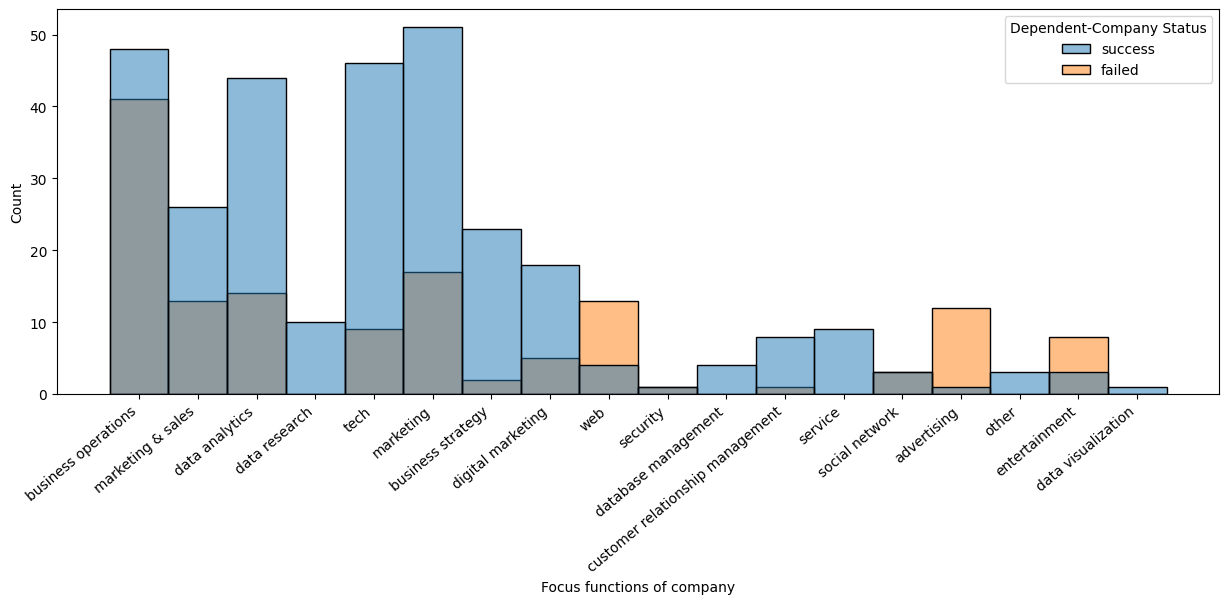

In [124]:
plt.figure(figsize = (15,5))
ax = sns.histplot(data=data_1, x="Focus functions of company", hue="Dependent-Company Status")
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [125]:
success_rate = (
    data_1.groupby("Focus functions of company")["Dependent-Company Status"]
    .apply(lambda x: (x == 'success').mean())  # Mean of success (1 for success, 0 for fail)
    .sort_values(ascending = False))

success_rate

,Dependent-Company Status
Focus functions of company,
data research,1.000000
data visualization,1.000000
database management,1.000000
other,1.000000
service,1.000000
business strategy,0.920000
customer relationship management,0.888889
tech,0.836364
digital marketing,0.782609


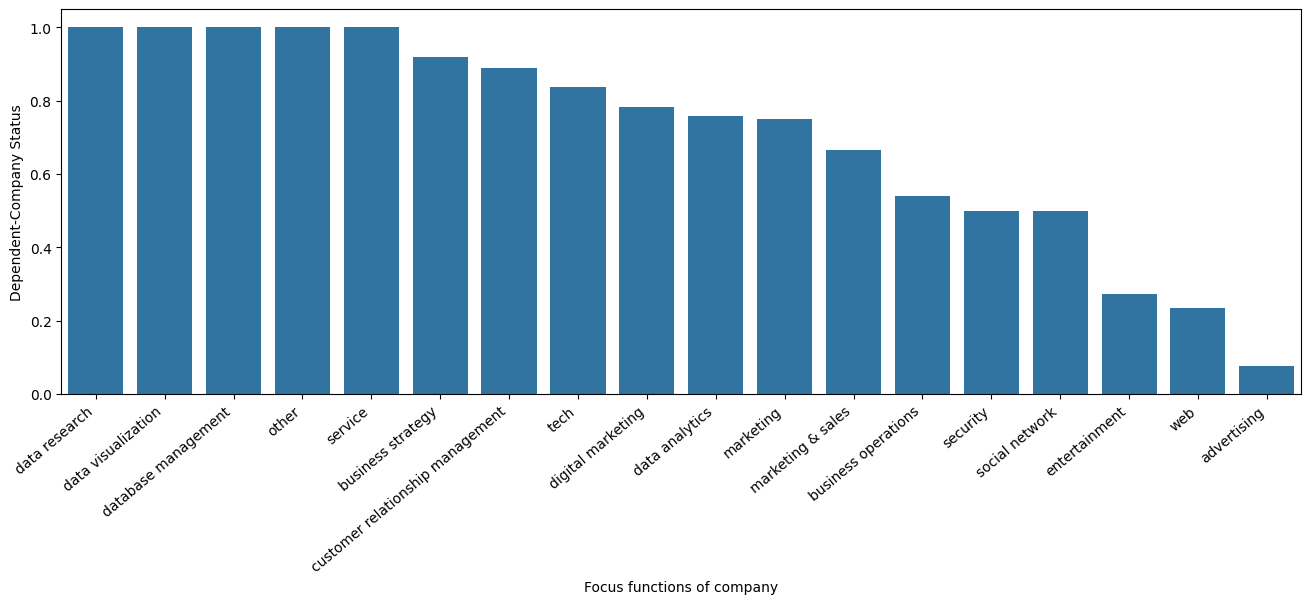

In [126]:
plt.figure(figsize = (16,5))
ax = sns.barplot(success_rate, legend = False)
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [127]:
obs = data_1.pivot_table(index="Focus functions of company",
                         columns="Dependent-Company Status",
                         aggfunc="size",
                         fill_value=0)
obs

Dependent-Company Status,failed,success
Focus functions of company,,
advertising,12,1
business operations,41,48
business strategy,2,23
customer relationship management,1,8
data analytics,14,44
data research,0,10
data visualization,0,1
database management,0,4
digital marketing,5,18


In [128]:
#Test of the statistical significance of the difference of frequency between categories

from scipy.stats import chi2_contingency

res = chi2_contingency(obs, correction=False)


In [129]:
#We can reject the null hypothesis : there is statistical significance in the frequencies

res.pvalue

1.9426097879387716e-11

# Other columns Engineering


In [130]:
#Convert false string to float

data_1['Number of of repeat investors'] = pd.to_numeric(data_1['Number of of repeat investors'], errors="coerce").astype("float")

In [136]:
data_1

,Dependent-Company Status,Focus functions of company,Number of Co-founders,Number of of advisors,Team size Senior leadership,Number of of repeat investors,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,...,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Barriers of entry for the competitors
0,success,business operations,1,2,2,4.0,no,small,no,no,...,no,no,no,no,no,no,yes,online,b2c,yes
1,success,marketing & sales,2,0,4,0.0,yes,large,yes,yes,...,yes,no,no,yes,yes,yes,no,online,b2c,yes
2,success,business operations,3,0,7,0.0,yes,medium,no,no,...,yes,no,no,yes,no,no,no,online,b2b,yes
3,success,marketing & sales,2,0,4,0.0,no,large,yes,yes,...,no,no,no,no,no,no,no,online,b2c,yes
4,success,marketing & sales,1,1,8,0.0,no,small,no,no,...,no,no,no,yes,no,no,no,online,b2b,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,failed,NaN,0,0,1,0.0,NaN,NaN,NaN,NaN,...,no,no,NaN,no,no,no,yes,online,b2b,yes
468,failed,web,0,0,1,0.0,NaN,NaN,NaN,NaN,...,no,no,NaN,no,no,no,yes,online,b2c,yes
469,failed,marketing,2,0,1,NaN,NaN,NaN,NaN,NaN,...,yes,no,no,yes,no,no,no,online,b2b,yes
470,failed,digital marketing,3,2,1,NaN,NaN,NaN,NaN,NaN,...,yes,no,no,no,no,no,no,online,b2c,yes


In [145]:
#Check if there are lines full of NaN -> to remove

number_of_nan = data_1.isnull().sum(axis = 1).sort_values(ascending = False)
to_drop = number_of_nan[number_of_nan > 5].index
number_of_nan[number_of_nan > 5]

,0
458,28
426,28
423,27
424,26
419,23
427,17
420,15
425,13
418,11
416,10


In [146]:
#Handling NaN : drop index with > 5 NaN

data_1 = data_1.drop(to_drop)

In [148]:
#Handling NaN : most frequent Imputer
from sklearn.impute import SimpleImputer

si_1 = SimpleImputer(strategy = 'most_frequent')

data_1 = pd.DataFrame(si_1.fit_transform(data_1) , columns = data_1.columns)

In [149]:

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 33 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   Dependent-Company Status                                                                                                           449 non-null    object
 1   Focus functions of company                                                                                                         449 non-null    object
 2   Number of Co-founders                                                                                                              449 non-null    object
 3   Number of of advisors                                                                          

In [150]:
#Check frequencies and statistical significancy

def chi_square_freq(data, column):
  obs = data.pivot_table(index=column,
                         columns="Dependent-Company Status",
                         aggfunc="size",
                         fill_value=0)
  res = chi2_contingency(obs, correction=False)
  return res.pvalue



In [151]:
dic_chi2 = {}

for i in data_1.columns :
  dic_chi2[i] = [chi_square_freq(data_1, i)]

chi2 = pd.DataFrame(dic_chi2).transpose().sort_values(ascending = False, by = 0)
chi2

,0
"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",8.888015e-01
Linear or Non-linear business model,6.647401e-01
Have been part of startups in the past?,5.587787e-01
Online or offline venture - physical location based business or online venture?,3.386289e-01
Speech analytics business,2.663333e-01
Have been part of successful startups in the past?,2.413490e-01
Crowdsourcing based business,1.433835e-01
Product or service company?,1.262890e-01
Prescriptive analytics business,4.476998e-02
Subscription based business,3.723128e-02


In [152]:
#Check for the non significant columns

success_rate = (
    data_1.groupby("Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive")["Dependent-Company Status"]
    .apply(lambda x: (x == 'success').mean())  # Mean of success (1 for success, 0 for fail)
    .sort_values(ascending = False))

success_rate

,Dependent-Company Status
"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",
no,0.676647
yes,0.669565


In [153]:
# drop all the columns that are above the threshold of 0.05

to_drop = chi2.head(8).index.tolist()

data_1 = data_1.drop(to_drop, axis = 1)

In [154]:
#Encoding and transforming column to int
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 25 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Dependent-Company Status                                 449 non-null    object
 1   Focus functions of company                               449 non-null    object
 2   Number of Co-founders                                    449 non-null    object
 3   Number of of advisors                                    449 non-null    object
 4   Team size Senior leadership                              449 non-null    object
 5   Number of of repeat investors                            449 non-null    object
 6   Worked in top companies                                  449 non-null    object
 7   Average size of companies worked for in the past         449 non-null    object
 8   Was he or she partner in Big 5 consultin

In [157]:
# Print uniques and find insights about data

for i in data_1.columns :
  print('='*50)
  print('')
  print(i, data_1[i].unique())
  print('')


Dependent-Company Status ['success' 'failed']


Focus functions of company ['business operations' 'marketing & sales' 'data analytics'
 'data research' 'tech' 'marketing' 'business strategy'
 'digital marketing' 'web' 'security' 'database management'
 'customer relationship management' 'service' 'social network'
 'advertising' 'other' 'entertainment' 'data visualization']


Number of Co-founders [1 2 3 4 0 5 7 6]


Number of of advisors [ 2  0  1  9  4  8  6  3 10 13  5  7 11]


Team size Senior leadership [ 2  4  7  8  3  6  5  1 10 14  9 12 11 24]


Number of of repeat investors [ 4.  0.  2.  1.  3.  5.  6. 10.]


Worked in top companies [0 1]


Average size of companies worked for in the past ['small' 'large' 'medium']


Was he or she partner in Big 5 consulting? [0 1]


Consulting experience? [0 1]


Catering to product/service across verticals [0 1]


Focus on consumer data? [0 1]


Subscription based business [1 0]


Cloud or platform based serive/product? ['platform' 'cloud' 'b

In [156]:
# replace yes by 1 and no by 0

data_1.replace({'yes':1, 'no':0}, inplace = True)

<ipython-input-156-f931f7ee8b69>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_1.replace({'yes':1, 'no':0}, inplace = True)


In [158]:
X = data_1.drop('Dependent-Company Status', axis = 1)
y = data_1['Dependent-Company Status']

In [167]:
#mapping the label

dic = {'success':1, 'failed':0}

y.replace(dic, inplace = True)

<ipython-input-167-af193b0a3bd8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(dic, inplace = True)


In [168]:
y

,Dependent-Company Status
0,1
1,1
2,1
3,1
4,1
...,...
444,0
445,0
446,0
447,0


In [161]:
#One Hot Encoding the remaining object columns using column transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_col = X.select_dtypes('object').columns.tolist()

ohe = OneHotEncoder()

colt = ColumnTransformer(
    transformers = [('', ohe, object_col)],
    remainder="passthrough"
)

X_enc = pd.DataFrame(colt.fit_transform(X), columns = colt.get_feature_names_out())

In [162]:
X_enc

,__Focus functions of company_advertising,__Focus functions of company_business operations,__Focus functions of company_business strategy,__Focus functions of company_customer relationship management,__Focus functions of company_data analytics,__Focus functions of company_data research,__Focus functions of company_data visualization,__Focus functions of company_database management,__Focus functions of company_digital marketing,__Focus functions of company_entertainment,...,remainder__Subscription based business,remainder__Crowdfunding based business,remainder__Machine Learning based business,remainder__Predictive Analytics business,remainder__Prescriptive analytics business,remainder__Big Data Business,remainder__Cross-Channel Analytics/ marketing channels,remainder__Owns data or not? (monetization of data) e.g. Factual,remainder__Is the company an aggregator/market place? e.g. Bluekai,remainder__Barriers of entry for the competitors
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Training Model

In [169]:
#Define a metric function using cross validation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score


def model_select(model, X, y):
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  return cross_val_score(model,X, y, cv = kf, scoring = 'precision').mean()


In [172]:
# Model 1 : LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=1.0,
    max_iter=500,
    class_weight='balanced',
    random_state=42
)

model_select(log_reg, X_enc, y)

0.8980216478381735

In [173]:
# Model 2 : Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_select(rf, X_enc, y)

0.9042461144538925

In [177]:
# 23 min of searching
#Keep the random forest and do the hyper parameter tuning
#Didn't improve the model so no use

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_enc, y)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


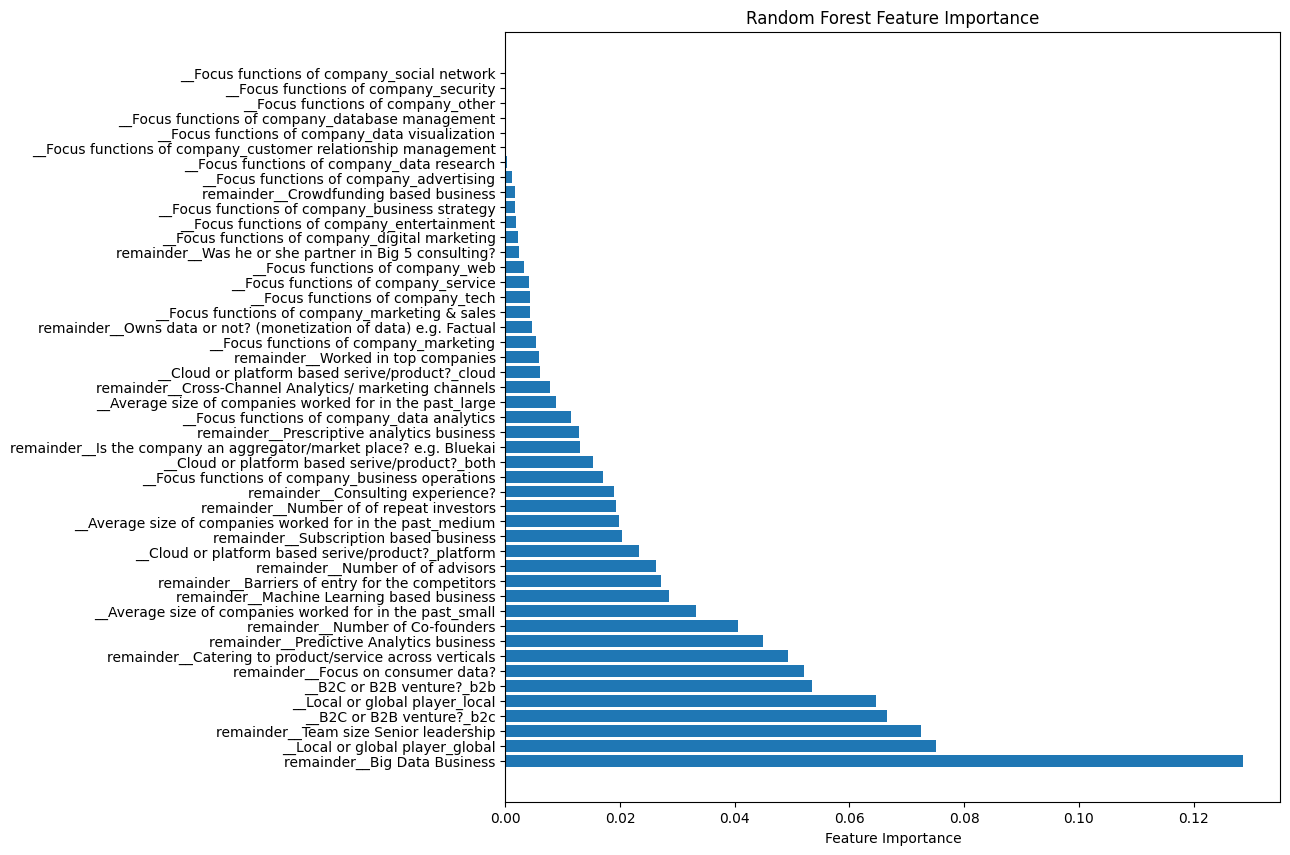

In [184]:
#Feature importance
#Aligns with our first analysis with chi squared test


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size = 0.15, shuffle = True)

rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [212]:
to_drop = importance_df['Feature'][-5:].values
to_drop

array(['__Focus functions of company_data visualization',
       '__Focus functions of company_database management',
       '__Focus functions of company_other',
       '__Focus functions of company_security',
       '__Focus functions of company_social network'], dtype=object)

In [213]:
#Try to train without the less important ones

X_enc2 = X_enc.drop(to_drop, axis = 1)
X_enc2

,__Focus functions of company_advertising,__Focus functions of company_business operations,__Focus functions of company_business strategy,__Focus functions of company_customer relationship management,__Focus functions of company_data analytics,__Focus functions of company_data research,__Focus functions of company_digital marketing,__Focus functions of company_entertainment,__Focus functions of company_marketing,__Focus functions of company_marketing & sales,...,remainder__Subscription based business,remainder__Crowdfunding based business,remainder__Machine Learning based business,remainder__Predictive Analytics business,remainder__Prescriptive analytics business,remainder__Big Data Business,remainder__Cross-Channel Analytics/ marketing channels,remainder__Owns data or not? (monetization of data) e.g. Factual,remainder__Is the company an aggregator/market place? e.g. Bluekai,remainder__Barriers of entry for the competitors
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
#decrease of perf, keeping rf

rf2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_select(rf2, X_enc2, y)

0.8862543059873426

# Results

<Axes: >

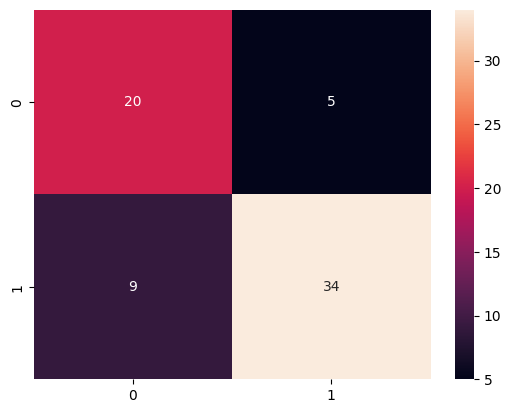

In [250]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

m1 = confusion_matrix(y_test, rf.predict(X_test))

sns.heatmap(m1, annot = True)

In [251]:
from sklearn.metrics import precision_score

precision_score(rf.predict(X_test), y_test)

0.7906976744186046

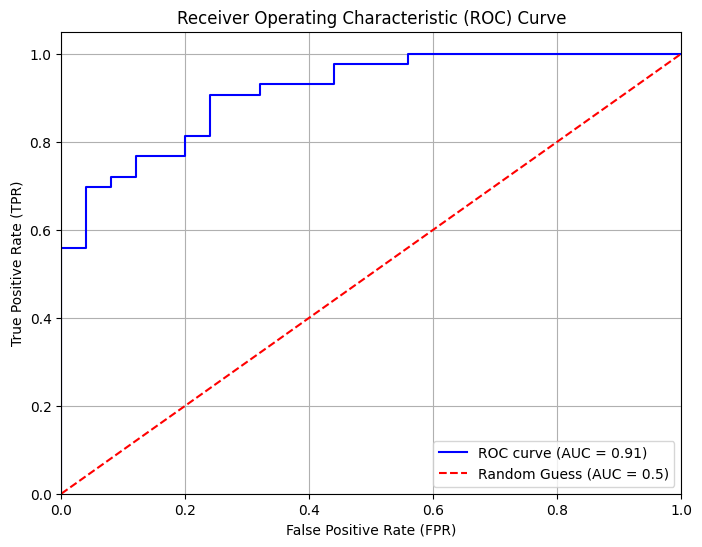

In [252]:
#AUC-ROC Curves

from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess (AUC = 0.5)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [253]:
roc_curve(y_test, y_probs)

(array([0.  , 0.  , 0.  , 0.04, 0.04, 0.08, 0.08, 0.12, 0.12, 0.2 , 0.2 ,
        0.24, 0.24, 0.32, 0.32, 0.44, 0.44, 0.56, 0.56, 1.  ]),
 array([0.        , 0.02325581, 0.55813953, 0.55813953, 0.69767442,
        0.69767442, 0.72093023, 0.72093023, 0.76744186, 0.76744186,
        0.81395349, 0.81395349, 0.90697674, 0.90697674, 0.93023256,
        0.93023256, 0.97674419, 0.97674419, 1.        , 1.        ]),
 array([       inf, 0.95273069, 0.74942372, 0.74678379, 0.68673276,
        0.64039848, 0.61400282, 0.59023002, 0.55391965, 0.50245337,
        0.49797364, 0.48604042, 0.42806737, 0.39584238, 0.38767714,
        0.3564748 , 0.33006317, 0.24183647, 0.2361886 , 0.0496665 ]))

In [254]:
#Defining a new threshold to have a precision of 1

y_pred_tuned = [1 if i > 0.33 else 0 for i in y_probs]


<Axes: >

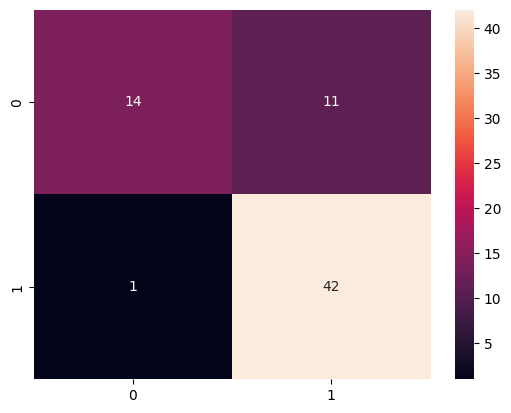

In [255]:
m1 = confusion_matrix(y_test, y_pred_tuned)

sns.heatmap(m1, annot = True)

In [256]:
#Model missed only one success -> prediction close to one

precision_score(y_pred_tuned, y_test)

0.9767441860465116

In [261]:
#Checking accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned, y_test)

0.8235294117647058